In [1]:
!pip install pandas numpy scikit-learn transformers datasets nltk


In [2]:
import pandas as pd

df = pd.read_csv("IMDB Dataset.csv")
print(df.head())
print(df['sentiment'].value_counts())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [4]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)  # removing HTML tags
    text = re.sub(r"[^a-zA-Z]", " ", text)  # removing special chars
    text = " ".join([w for w in text.split() if w not in stopwords.words("english")])
    return text

df['clean_review'] = df['review'].apply(clean_text)
print(df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                        clean_review  
0  one reviewers mentioned watching oz episode ho...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically family little boy jake thinks zombie...  
4  petter mattei love time money visually stunnin...  


In [19]:
from transformers import pipeline

sentiment_pipe = pipeline("sentiment-analysis")

sample_review = df['clean_review'][0]
print("Review:", sample_review)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Review: one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack stree

In [11]:
sample_review1 = "The movie had amazing visuals but the story was too slow and boring."


In [12]:
sample_review2="This was the best film I’ve ever seen!"

In [20]:
prompt1 = f"Classify the sentiment of this review: {sample_review}"
output1 = sentiment_pipe(prompt1)
print("Prompt 1 Output:", output1)


Prompt 1 Output: [{'label': 'NEGATIVE', 'score': 0.9756522178649902}]


In [21]:
prompt2 = (
    "Here are examples: "
    "'This movie was great!' → Positive, "
    "'I hated the film' → Negative. "
    f"Now classify: {sample_review}"
)
output2 = sentiment_pipe(prompt2)
print("Prompt 2 Output:", output2)


Prompt 2 Output: [{'label': 'NEGATIVE', 'score': 0.9839954972267151}]


In [22]:
prompt3 = f"Analyze this review and explain whether it is positive or negative: {sample_review2}"
output3 = sentiment_pipe(prompt3)
print("Prompt 3 Output:", output3)


Prompt 3 Output: [{'label': 'POSITIVE', 'score': 0.9997827410697937}]


In [23]:
from sklearn.metrics import accuracy_score, classification_report

# to run predictions on subset
preds = [sentiment_pipe(text[:512])[0]['label'] for text in df['clean_review'][:1000]]
true = df['sentiment'][:1000].apply(lambda x: "POSITIVE" if x=="positive" else "NEGATIVE")

print("Accuracy:", accuracy_score(true, preds))
print(classification_report(true, preds))


Accuracy: 0.795
              precision    recall  f1-score   support

    NEGATIVE       0.74      0.90      0.81       499
    POSITIVE       0.88      0.69      0.77       501

    accuracy                           0.80      1000
   macro avg       0.81      0.80      0.79      1000
weighted avg       0.81      0.80      0.79      1000



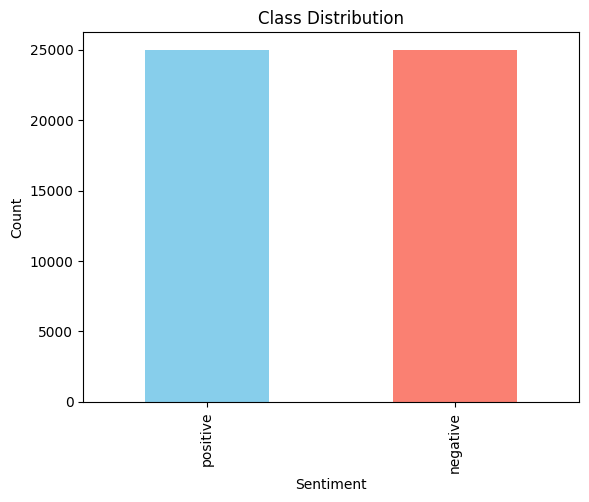

In [24]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar', title="Class Distribution", color=['skyblue', 'salmon'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


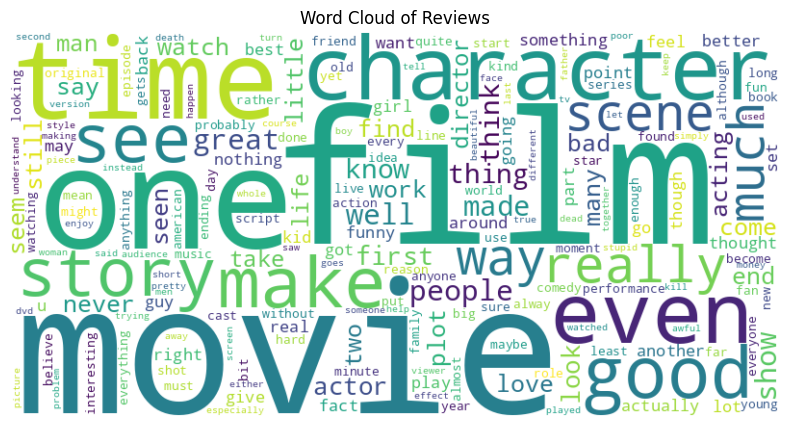

In [25]:
from wordcloud import WordCloud

text = " ".join(df['clean_review'].sample(2000))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()


In [26]:
sample_review = "The movie had amazing visuals but the story was too slow and boring."

outputs = {}

prompt1 = f"Classify the sentiment of this review: {sample_review}"
outputs["Prompt 1"] = sentiment_pipe(prompt1)[0]

prompt2 = (
    "Here are examples: "
    "'This movie was great!' → Positive, "
    "'I hated the film' → Negative. "
    f"Now classify: {sample_review}"
)
outputs["Prompt 2"] = sentiment_pipe(prompt2)[0]

prompt3 = f"Analyze this review and explain whether it is positive or negative: {sample_review}"
outputs["Prompt 3"] = sentiment_pipe(prompt3)[0]

for k, v in outputs.items():
    print(f"{k} → {v}")


Prompt 1 → {'label': 'NEGATIVE', 'score': 0.9946086406707764}
Prompt 2 → {'label': 'NEGATIVE', 'score': 0.9974009990692139}
Prompt 3 → {'label': 'NEGATIVE', 'score': 0.9989966750144958}


In [27]:
custom_reviews = [
    "I absolutely loved this movie, it was fantastic!",   # Positive
    "Worst film I’ve ever seen, total waste of time.",    # Negative
    "The visuals were stunning, but the plot was boring." # Mixed
]

for review in custom_reviews:
    result = sentiment_pipe(review)
    print(f"Review: {review}\nPrediction: {result}\n")


Review: I absolutely loved this movie, it was fantastic!
Prediction: [{'label': 'POSITIVE', 'score': 0.9998805522918701}]

Review: Worst film I’ve ever seen, total waste of time.
Prediction: [{'label': 'NEGATIVE', 'score': 0.9997958540916443}]

Review: The visuals were stunning, but the plot was boring.
Prediction: [{'label': 'NEGATIVE', 'score': 0.9982379674911499}]

